## Topic - Stroke Prediction using Machine Learning

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
from scipy import stats

### 1. Read the dataset and view the first 10 rows of it.


In [2]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### 2. Check the shape/dimension of the dataset

In [4]:
# shape of the data
df.shape

(5110, 12)

### 3. Check for the missing values.Display number of missing values per column

In [5]:
# missing values per column
count=df.isnull().sum()
percentage=(df.isnull().sum()/len(df))*100
missing_values=pd.concat([count,percentage],axis=1,keys=['count','percentage'])
missing_values

,count,percentage
id,0,0.000000
gender,0,0.000000
age,0,0.000000
hypertension,0,0.000000
heart_disease,0,0.000000
ever_married,0,0.000000
work_type,0,0.000000
Residence_type,0,0.000000
avg_glucose_level,0,0.000000
bmi,201,3.933464


### 4. Investigate and predict the missing BMI Value.

In [6]:
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [7]:
df[df['bmi'].isnull()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


The skewness of bmi is  1.0553402052962912


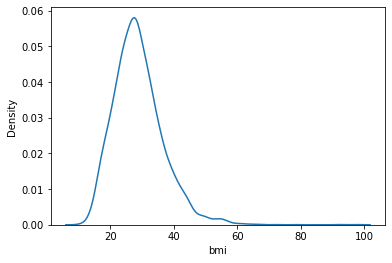

In [8]:
sns.kdeplot(df.bmi)
print('The skewness of bmi is ',df.bmi.skew())
plt.show()

In [9]:
# As bmi is right skewed filling null values by median
df.bmi=df.bmi.fillna(df['bmi'].median())
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### 5. Check the datatype, number of non null values and name of each variable in the dataset.


In [10]:
# data types of the variables
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [11]:
# Number of non-null values
print(f"The number of not null values are \n{df.notnull().sum()}")

The number of not null values are 
id                   5110
gender               5110
age                  5110
hypertension         5110
heart_disease        5110
ever_married         5110
work_type            5110
Residence_type       5110
avg_glucose_level    5110
bmi                  5110
smoking_status       5110
stroke               5110
dtype: int64


In [12]:
# Name of each variable in dataset
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

### 6. Check the descriptive statistics of the dataset.


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,28.862035,7.699562,10.30,23.800,28.100,32.80,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


### 7. Visualize the proportion of Stroke samples in the dataset.


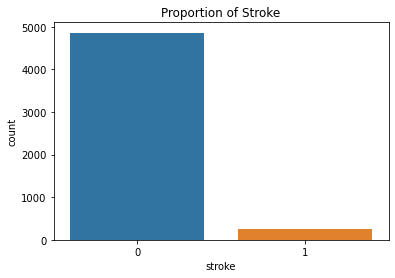

In [14]:
sns.countplot(df.stroke)
plt.title('Proportion of Stroke')
plt.show()

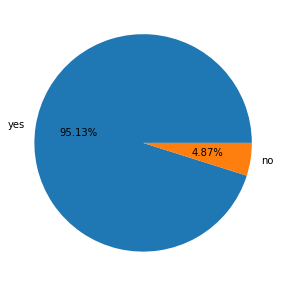

In [15]:
plt.figure(figsize=(15,5))
plt.pie(df.stroke.value_counts(),autopct='%2.2f%%',labels=['yes','no'])
plt.show()

The Proportion of Stroke is less as compared to non stroke people in the dataset

### 8. Visualize the Distribution of Male and Female Ages. Write the Observation.


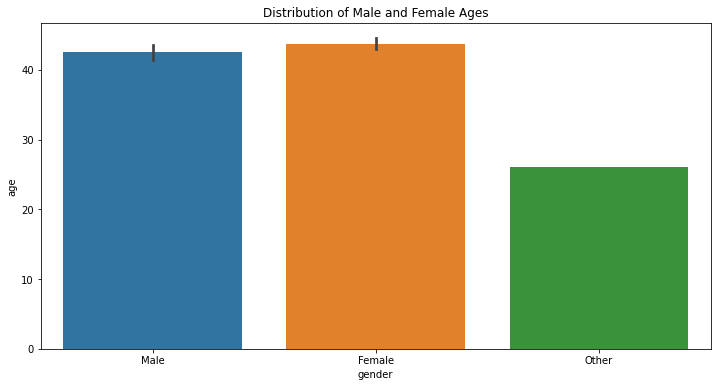

In [16]:
plt.figure(figsize=(12,6))
plt.title('Distribution of Male and Female Ages')
sns.barplot(x=df['gender'],y=df['age'])
plt.show()

we can see that Distribution of Male and Female Ages are neraly equal.

### 9.Visualize the stroke sample based on
### a) BMI and Glucose Level

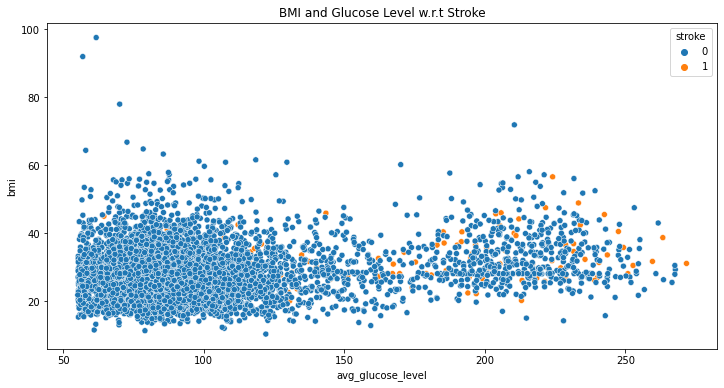

In [17]:
plt.figure(figsize=(12,6))
sns.scatterplot(df.avg_glucose_level,df.bmi,hue=df.stroke)
plt.title('BMI and Glucose Level w.r.t Stroke')
plt.show()

As avg_glucose_level increases we can see a few people having stroke

### 10.Visualize the stroke sample based on
### b) BMI and Age


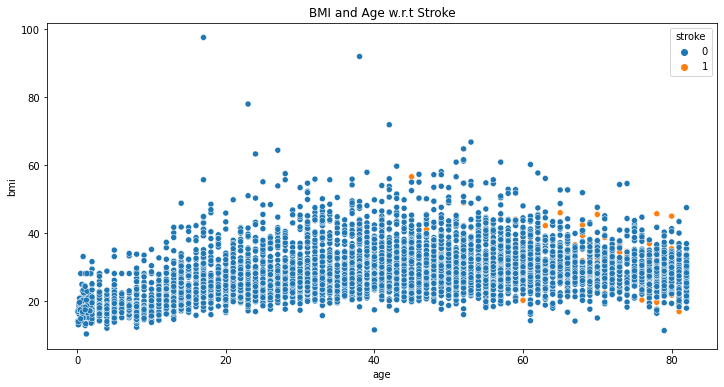

In [18]:
plt.figure(figsize=(12,6))
sns.scatterplot(df.age,df.bmi,hue=df.stroke)
plt.title('BMI and Age w.r.t Stroke')
plt.show()

As Age increases we can see a few people having stroke

### 11. Using the pie chart visualizes the proportion of different smoking categories among the stroke population.

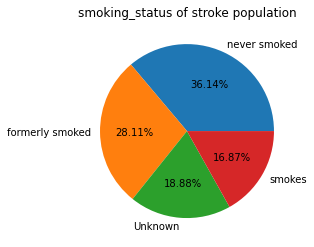

In [19]:
# stroke population
s=df[df['stroke']==1]

# visualizing
plt.pie(s['smoking_status'].value_counts(),autopct='%.2f%%',labels=['never smoked','formerly smoked','Unknown','smokes'])
plt.title('smoking_status of stroke population')
plt.show()

From the above pie plot, we see that the data has a high proportion for never smoked.

### 12. Perform hypothesis testing to find the significant variables.


In [20]:
# Numerical columns
num_cols=df.select_dtypes(include=np.number)

# hypothesis testing between stroke feature and other numerical features
# H0: Both groups have equal mean indicating that they are insignificant.
# H1: Both groups do not have equal mean indicating that they are significant.

significant_features=[]
for i in num_cols:
    if i !='stroke':
        pvalue=stats.ttest_ind(df[i],df.stroke)[1]
        if pvalue<0.05:
            print(i,pvalue)
            significant_features.append(i)
        else:
            print(i,pvalue)
            
print('The significant_features are\n ',significant_features)

id 0.0
age 0.0
hypertension 2.4828630276395242e-21
heart_disease 0.22637221796027784
avg_glucose_level 0.0
bmi 0.0
The significant_features are
  ['id', 'age', 'hypertension', 'avg_glucose_level', 'bmi']


In [21]:
# categorical column
cat_cols=df.select_dtypes(exclude=np.number)
cat_cols

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


In [22]:
# doubt
import statsmodels.formula.api as sfa
model=sfa.ols('stroke~gender',data=df).fit()
aov_table=sfa.stats.anova_lm(model)
aov_table

AttributeError: module 'statsmodels.formula.api' has no attribute 'stats'

### 13. Drop the unnecessary columns.

In [24]:
df1=df.drop('id',axis=1)
df1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


we drop id drop as it is considered as unnecessary column while model building

### 14. Write the code to replace following categories columns in integer format as follow –
#### a)work_type('Private':0,'Selfemployed':1,'Govt_job':2,'children':1,'Never_worked':-2)


In [25]:
# Encoding work_type variable
df1['work_type']=df1['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':1,'Never_worked':-2})

#### b) ever_married('Yes': 1, 'No': 0)

In [26]:
# Encoding ever_married variable
df1['ever_married']=df1['ever_married'].replace({'Yes': 1, 'No': 0})

####  c) smoking_status('never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1)


In [27]:
# Encoding smoking_status variable
df1['smoking_status']=df1['smoking_status'].replace({'never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1})

In [28]:
# Encoding gender variable
freq=df1.gender.value_counts(normalize=True)
df1['gender']=df1['gender'].replace(freq)

In [29]:
# Encoding Residence_type variable
df1['Residence_type']=df1['Residence_type'].replace({'Urban':0,'Rural':1})
df1.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.413894,67.0,0,1,1,0,0,228.69,36.6,2,1
1,0.585910,61.0,0,0,1,1,1,202.21,28.1,0,1


### 15. Check the distribution of 'bmi' and 'stroke' columns in the dataset.

The skewness of the bmi column is 1.0881872326442346


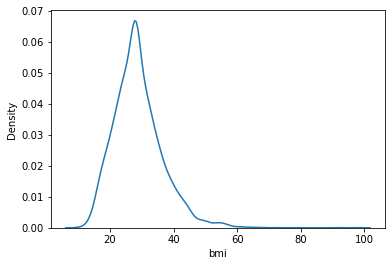

In [30]:
# distribution of 'bmi' 
sns.kdeplot(df1['bmi'])
print('The skewness of the bmi column is',df1.bmi.skew())
plt.show()

The bmi column is right skewed

The skewness of the stroke column is 4.193284486071313


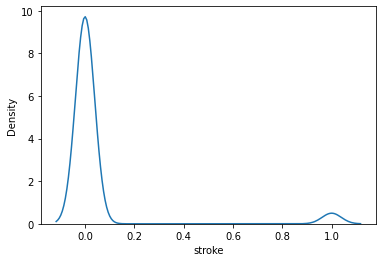

In [31]:
# distribution of 'stroke' 
sns.kdeplot(df1['stroke'])
print('The skewness of the stroke column is',df1.stroke.skew())
plt.show()

The stroke column is highly right skewed

Skewness of BMI of class 0 is 1.095903631197483
Skewness of BMI of class 1 is 1.1275651326762677


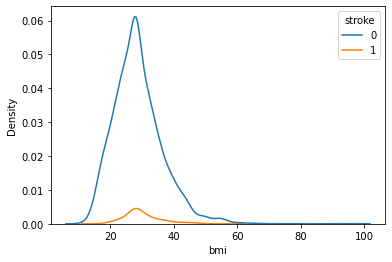

In [32]:
sns.kdeplot(df1['bmi'],hue=df1['stroke'])
print(f"Skewness of BMI of class 0 is {df1.loc[df1['stroke']==0,'bmi'].skew()}")
print(f"Skewness of BMI of class 1 is {df1.loc[df1['stroke']==1,'bmi'].skew()}")

### 16. List down columns that are highly skewed.

In [33]:
highly_skewed=[]
for i in df1.columns:
    if (df1[i].skew()>0.5) | (df1[i].skew()<-0.5):
        highly_skewed.append(i)
print('The highly_skewed columns are\n ',highly_skewed)

The highly_skewed columns are
  ['hypertension', 'heart_disease', 'ever_married', 'work_type', 'avg_glucose_level', 'bmi', 'stroke']


### 17. List down the columns that are highly kurtosis.

In [34]:
highly_kurt=[]
for i in df1.columns:
    if (df1[i].kurt()>1) | (df1[i].kurt()<-1):
        highly_kurt.append(i)
print('The columns with high kurtosis are\n ',highly_kurt)

The columns with high kurtosis are
  ['gender', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'avg_glucose_level', 'bmi', 'stroke']


### 18. Find the distribution of all variables with respect to the outcome 'stroke' variable.


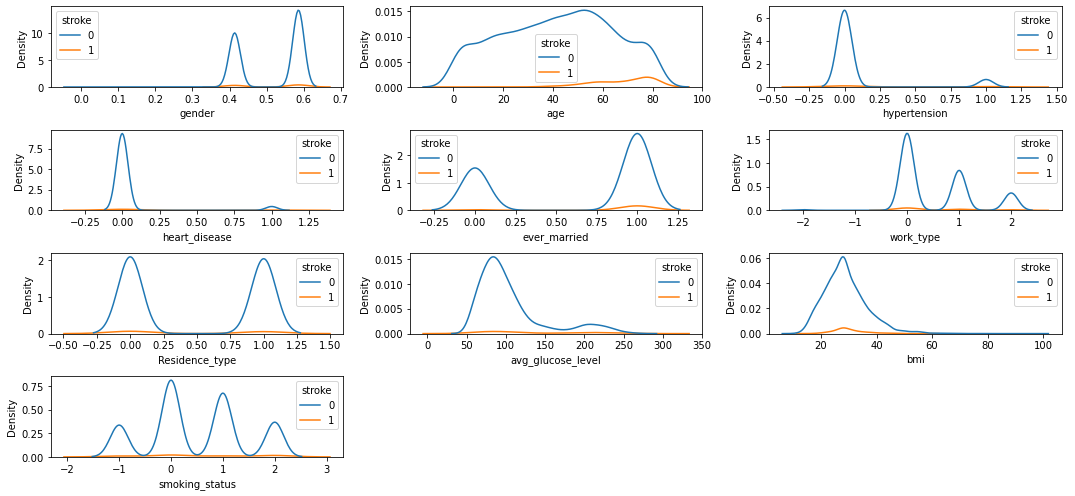

In [35]:
cols=['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']
plt.figure(figsize=(15,7))
it=1
for i in cols:
    plt.subplot(4,3,it)
    sns.kdeplot(df1[i],hue=df1['stroke'])
    it+=1
plt.tight_layout()
plt.show()

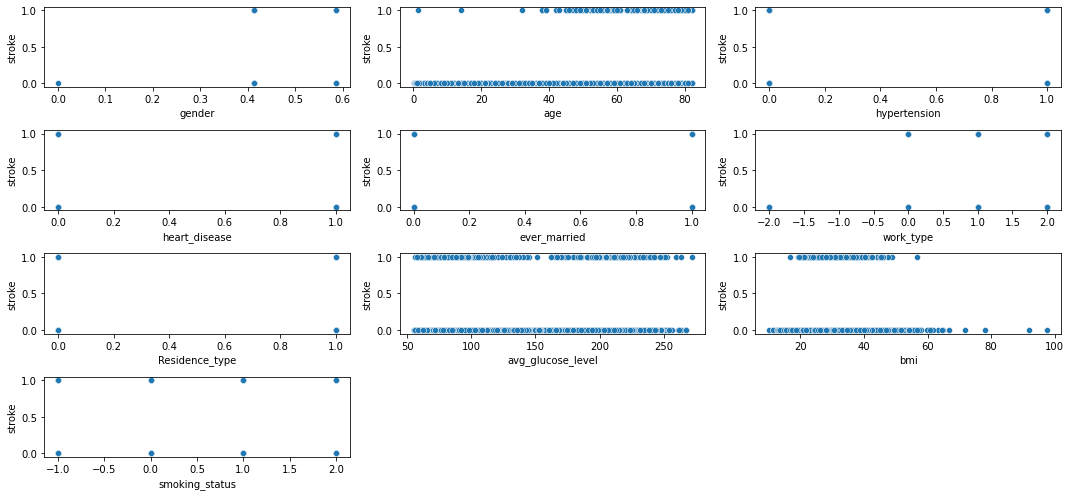

In [36]:
cols=['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']
plt.figure(figsize=(15,7))
it=1
for i in cols:
    plt.subplot(4,3,it)
    sns.scatterplot(df1[i],df1['stroke'])
    it+=1
plt.tight_layout()
plt.show()

### 19. Plot the heatmap for correlation matrix for the given dataset. Write the observation. Especially note down columns that are highly correlated (Positive or negative correlation, consider 0.7 to 1 as high)

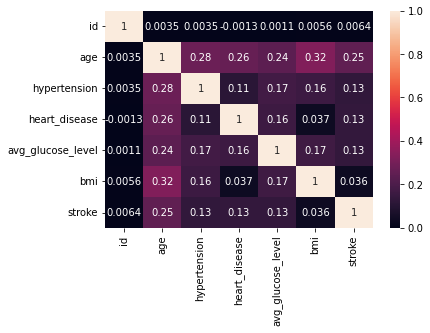

In [37]:
sns.heatmap(df.corr(),annot=True)
plt.show()

**inference**
* We can see that there is no high correlation between the variables
* The highest correlation found is 0.32 between age and bmi
* The next highest correlation found is 0.28 between hypertension and age
* id column is highly negatively correlated with all columns
* heart_disease and stroke w.r.t bmi are negatively correlated


### 20. Split the dataset randomly into train and test dataset. Use a train ratio of 70:30 ratio.


In [38]:
from sklearn.model_selection import train_test_split
x=df1.drop('stroke',axis=1)
y=df1.stroke
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(3577, 10)
(1533, 10)
(3577,)
(1533,)


### 21. Check the dataset is balanced or imbalanced. If it is highly investigated, a different approach to balanced the dataset by using the correct technique.

In [39]:
df.stroke.value_counts(normalize=True)*100

0    95.127202
1     4.872798
Name: stroke, dtype: float64

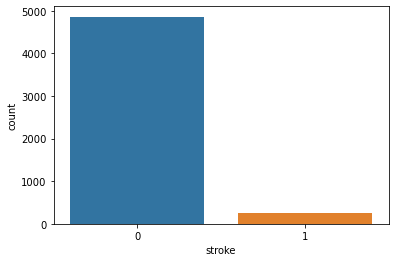

In [40]:
sns.countplot(df.stroke)
plt.show()

Yes,There is imbalance in the data

In [41]:
from collections import Counter
from imblearn.over_sampling import SMOTE
print('Before smote ',Counter(y))
smote=SMOTE(sampling_strategy=0.5,random_state=0)
x_sm,y_sm=smote.fit_resample(x,y)
print('After SMOTE', Counter(y_sm))

Before smote  Counter({0: 4861, 1: 249})
After SMOTE Counter({0: 4861, 1: 2430})


In [42]:
# Spilting the data after SMOTE
xtrain,xtest,ytrain,ytest=train_test_split(x_sm,y_sm,test_size=0.30,random_state=0)

### 22. Model Selection/hyperparameter tuning 
- Try different models and fine tune their performance until you get the desired level of
performance on the given dataset.
 Model Evaluation
- Evaluate the models using appropriate evaluation metrics.

### Logistics Regression-sklearn

In [99]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr_model=lr.fit(xtrain,ytrain)
ypred_lr_train=lr_model.predict(xtrain)
ypred_lr_test=lr_model.predict(xtest)
yprob_lr=lr_model.predict_proba(xtest)[:,1]

### Evaluation metrics

In [100]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score,roc_auc_score
cols=['Model_name','Train_accuracy','Test_accuracy','precision','recall','kappa','f1_score','roc_auc_score']
result=pd.DataFrame(columns=cols)
model_stats=pd.Series({'Model_name':'LogisticRegression',
              'Train_accuracy':accuracy_score(ytrain,ypred_lr_train),
              'Test_accuracy':accuracy_score(ytest,ypred_lr_test),
               'precision':precision_score(ytest,ypred_lr_test),
                'recall':recall_score(ytest,ypred_lr_test),
                 'kappa':cohen_kappa_score(ytest,ypred_lr_test),
                'f1_score':f1_score(ytest,ypred_lr_test),
              'roc_auc_score':roc_auc_score(ytest,yprob_lr)})
result=result.append(model_stats,ignore_index=True)
result

,Model_name,Train_accuracy,Test_accuracy,precision,recall,kappa,f1_score,roc_auc_score
0,LogisticRegression,0.805213,0.813528,0.769592,0.652926,0.57118,0.706475,0.885363


### Decision Tree --Base Model

In [101]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=0)
dt_model=dt.fit(xtrain,ytrain)
yred_dt_train=dt_model.predict(xtrain)
yred_dt_test=dt_model.predict(xtest)
yprob_dt=dt_model.predict_proba(xtest)[:,1]

In [102]:
model_stats=pd.Series({'Model_name':'DecisionTree',
              'Train_accuracy':accuracy_score(ytrain,yred_dt_train),
              'Test_accuracy':accuracy_score(ytest,yred_dt_test),
               'precision':precision_score(ytest,yred_dt_test),
                'recall':recall_score(ytest,yred_dt_test),
                 'kappa':cohen_kappa_score(ytest,yred_dt_test),
                'f1_score':f1_score(ytest,yred_dt_test),
              'roc_auc_score':roc_auc_score(ytest,yprob_dt)})
result=result.append(model_stats,ignore_index=True)
result

,Model_name,Train_accuracy,Test_accuracy,precision,recall,kappa,f1_score,roc_auc_score
0,LogisticRegression,0.805213,0.813528,0.769592,0.652926,0.57118,0.706475,0.885363
1,DecisionTree,1.0,0.90128,0.84715,0.869681,0.782551,0.858268,0.893754


In [103]:
# we can see that the model is performing good and its overfits

In [104]:
## Grid Search Cv
from sklearn.model_selection import GridSearchCV
dt=DecisionTreeClassifier(class_weight='balanced',random_state=0)
params=({'criterion':['gini','entropy'],'max_depth':[5,6,7]})
grid=GridSearchCV(dt,param_grid=params,cv=5)
grid.fit(xtrain,ytrain)
grid.best_params_

{'criterion': 'entropy', 'max_depth': 7}

### Decision tree model with hyperparameter tuning

In [105]:
dt1=DecisionTreeClassifier(criterion='entropy',max_depth=5)
dt1_model=dt1.fit(xtrain,ytrain)
ypred_dt1_train=dt1_model.predict(xtrain)
ypred_dt1_test=dt1_model.predict(xtest)
yprob_dt1=dt1_model.predict_proba(xtest)[:,1]

In [106]:
model_stats=pd.Series({'Model_name':'Decision Tree with Gridsearchcv',
              'Train_accuracy':accuracy_score(ytrain,ypred_dt1_train),
              'Test_accuracy':accuracy_score(ytest,ypred_dt1_test),
               'precision':precision_score(ytest,ypred_dt1_test),
                'recall':recall_score(ytest,ypred_dt1_test),
                 'kappa':cohen_kappa_score(ytest,ypred_dt1_test),
                'f1_score':f1_score(ytest,ypred_dt1_test),
              'roc_auc_score':roc_auc_score(ytest,yprob_dt1)})
result=result.append(model_stats,ignore_index=True)
result

,Model_name,Train_accuracy,Test_accuracy,precision,recall,kappa,f1_score,roc_auc_score
0,LogisticRegression,0.805213,0.813528,0.769592,0.652926,0.57118,0.706475,0.885363
1,DecisionTree,1.0,0.90128,0.84715,0.869681,0.782551,0.858268,0.893754
2,Decision Tree with Gridsearchcv,0.845189,0.835923,0.809449,0.683511,0.622308,0.741168,0.913781


## Random Forest Model

In [107]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf_model=rf.fit(xtrain,ytrain)
ypred_rf_train=rf_model.predict(xtrain)
ypred_rf_test=rf_model.predict(xtest)
yprob_rf=rf_model.predict_proba(xtest)[:,1]

In [108]:
model_stats=pd.Series({'Model_name':'Random Forest ',
              'Train_accuracy':accuracy_score(ytrain,ypred_rf_train),
              'Test_accuracy':accuracy_score(ytest,ypred_rf_test),
               'precision':precision_score(ytest,ypred_rf_test),
                'recall':recall_score(ytest,ypred_rf_test),
                 'kappa':cohen_kappa_score(ytest,ypred_rf_test),
                'f1_score':f1_score(ytest,ypred_rf_test),
              'roc_auc_score':roc_auc_score(ytest,yprob_rf)})
result=result.append(model_stats,ignore_index=True)
result

,Model_name,Train_accuracy,Test_accuracy,precision,recall,kappa,f1_score,roc_auc_score
0,LogisticRegression,0.805213,0.813528,0.769592,0.652926,0.57118,0.706475,0.885363
1,DecisionTree,1.0,0.90128,0.84715,0.869681,0.782551,0.858268,0.893754
2,Decision Tree with Gridsearchcv,0.845189,0.835923,0.809449,0.683511,0.622308,0.741168,0.913781
3,Random Forest,1.0,0.925046,0.922414,0.853723,0.830855,0.88674,0.976776


## K Nearest Neighbors (KNN)

In [109]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
knn_model=kn.fit(xtrain,ytrain)
ypred_knn_train=knn_model.predict(xtrain)
ypred_knn_test=knn_model.predict(xtest)
yprob_knn=knn_model.predict_proba(xtest)[:,1]

In [110]:
model_stats=pd.Series({'Model_name':'K Nearest Neighbors',
              'Train_accuracy':accuracy_score(ytrain,ypred_knn_train),
              'Test_accuracy':accuracy_score(ytest,ypred_knn_test),
               'precision':precision_score(ytest,ypred_knn_test),
                'recall':recall_score(ytest,ypred_knn_test),
                 'kappa':cohen_kappa_score(ytest,ypred_knn_test),
                'f1_score':f1_score(ytest,ypred_knn_test),
              'roc_auc_score':roc_auc_score(ytest,yprob_knn)})
result=result.append(model_stats,ignore_index=True)
result

,Model_name,Train_accuracy,Test_accuracy,precision,recall,kappa,f1_score,roc_auc_score
0,LogisticRegression,0.805213,0.813528,0.769592,0.652926,0.57118,0.706475,0.885363
1,DecisionTree,1.0,0.90128,0.84715,0.869681,0.782551,0.858268,0.893754
2,Decision Tree with Gridsearchcv,0.845189,0.835923,0.809449,0.683511,0.622308,0.741168,0.913781
3,Random Forest,1.0,0.925046,0.922414,0.853723,0.830855,0.88674,0.976776
4,K Nearest Neighbors,0.908289,0.867459,0.748922,0.924202,0.721717,0.827381,0.942305


## Naive Bayes Algorithm

### GaussianNB

In [111]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb_model=gnb.fit(xtrain,ytrain)
ypred_gnb_train=gnb.predict(xtrain)
ypred_gnb_test=gnb.predict(xtest)
yprob_gnb=gnb.predict_proba(xtest)[:,1]

In [112]:
model_stats=pd.Series({'Model_name':'GaussianNB',
              'Train_accuracy':accuracy_score(ytrain,ypred_gnb_train),
              'Test_accuracy':accuracy_score(ytest,ypred_gnb_test),
               'precision':precision_score(ytest,ypred_gnb_test),
                'recall':recall_score(ytest,ypred_gnb_test),
                 'kappa':cohen_kappa_score(ytest,ypred_gnb_test),
                'f1_score':f1_score(ytest,ypred_gnb_test),
              'roc_auc_score':roc_auc_score(ytest,yprob_gnb)})
result=result.append(model_stats,ignore_index=True)
result

,Model_name,Train_accuracy,Test_accuracy,precision,recall,kappa,f1_score,roc_auc_score
0,LogisticRegression,0.805213,0.813528,0.769592,0.652926,0.57118,0.706475,0.885363
1,DecisionTree,1.0,0.90128,0.84715,0.869681,0.782551,0.858268,0.893754
2,Decision Tree with Gridsearchcv,0.845189,0.835923,0.809449,0.683511,0.622308,0.741168,0.913781
3,Random Forest,1.0,0.925046,0.922414,0.853723,0.830855,0.88674,0.976776
4,K Nearest Neighbors,0.908289,0.867459,0.748922,0.924202,0.721717,0.827381,0.942305
5,GaussianNB,0.785224,0.803931,0.691124,0.776596,0.577822,0.731371,0.871094


### BernoulliNB

In [113]:
from sklearn.naive_bayes import  BernoulliNB
bnb=BernoulliNB()
bnb_model=bnb.fit(xtrain,ytrain)
ypred_bnb_train=bnb_model.predict(xtrain)
ypred_bnb_test=bnb_model.predict(xtest)
yprob_bnb=bnb_model.predict_proba(xtest)[:,1]

In [114]:
model_stats=pd.Series({'Model_name':'BernoulliNB',
              'Train_accuracy':accuracy_score(ytrain,ypred_bnb_train),
              'Test_accuracy':accuracy_score(ytest,ypred_bnb_test),
               'precision':precision_score(ytest,ypred_bnb_test),
                'recall':recall_score(ytest,ypred_bnb_test),
                 'kappa':cohen_kappa_score(ytest,ypred_bnb_test),
                'f1_score':f1_score(ytest,ypred_bnb_test),
              'roc_auc_score':roc_auc_score(ytest,yprob_bnb)})
result=result.append(model_stats,ignore_index=True)
result

,Model_name,Train_accuracy,Test_accuracy,precision,recall,kappa,f1_score,roc_auc_score
0,LogisticRegression,0.805213,0.813528,0.769592,0.652926,0.57118,0.706475,0.885363
1,DecisionTree,1.0,0.90128,0.84715,0.869681,0.782551,0.858268,0.893754
2,Decision Tree with Gridsearchcv,0.845189,0.835923,0.809449,0.683511,0.622308,0.741168,0.913781
3,Random Forest,1.0,0.925046,0.922414,0.853723,0.830855,0.88674,0.976776
4,K Nearest Neighbors,0.908289,0.867459,0.748922,0.924202,0.721717,0.827381,0.942305
5,GaussianNB,0.785224,0.803931,0.691124,0.776596,0.577822,0.731371,0.871094
6,BernoulliNB,0.675877,0.668647,0.535433,0.271277,0.167725,0.360106,0.695016


## Bagging Classifier

In [115]:
from sklearn.ensemble import BaggingClassifier
bc=BaggingClassifier()
bc_model=bc.fit(xtrain,ytrain)
ypred_bc_train=bc_model.predict(xtrain)
ypred_bc_test=bc_model.predict(xtest)
yprob_bc=bc_model.predict_proba(xtest)[:,1]

In [116]:
model_stats=pd.Series({'Model_name':'Bagging Classifier',
              'Train_accuracy':accuracy_score(ytrain,ypred_bc_train),
              'Test_accuracy':accuracy_score(ytest,ypred_bc_test),
               'precision':precision_score(ytest,ypred_bc_test),
                'recall':recall_score(ytest,ypred_bc_test),
                 'kappa':cohen_kappa_score(ytest,ypred_bc_test),
                'f1_score':f1_score(ytest,ypred_bc_test),
              'roc_auc_score':roc_auc_score(ytest,yprob_bc)})
result=result.append(model_stats,ignore_index=True)
result

,Model_name,Train_accuracy,Test_accuracy,precision,recall,kappa,f1_score,roc_auc_score
0,LogisticRegression,0.805213,0.813528,0.769592,0.652926,0.57118,0.706475,0.885363
1,DecisionTree,1.0,0.90128,0.84715,0.869681,0.782551,0.858268,0.893754
2,Decision Tree with Gridsearchcv,0.845189,0.835923,0.809449,0.683511,0.622308,0.741168,0.913781
3,Random Forest,1.0,0.925046,0.922414,0.853723,0.830855,0.88674,0.976776
4,K Nearest Neighbors,0.908289,0.867459,0.748922,0.924202,0.721717,0.827381,0.942305
5,GaussianNB,0.785224,0.803931,0.691124,0.776596,0.577822,0.731371,0.871094
6,BernoulliNB,0.675877,0.668647,0.535433,0.271277,0.167725,0.360106,0.695016
7,Bagging Classifier,0.994905,0.922303,0.929204,0.837766,0.823643,0.881119,0.962014


# Boosting Methods

### AdaBoost

In [117]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad_model=ad.fit(xtrain,ytrain)
ypred_ad_train=ad_model.predict(xtrain)
ypred_ad_test=ad_model.predict(xtest)
yprob_ad=ad_model.predict_proba(xtest)[:,1]

In [118]:
model_stats=pd.Series({'Model_name':'AdaBoost',
              'Train_accuracy':accuracy_score(ytrain,ypred_ad_train),
              'Test_accuracy':accuracy_score(ytest,ypred_ad_test),
               'precision':precision_score(ytest,ypred_ad_test),
                'recall':recall_score(ytest,ypred_ad_test),
                 'kappa':cohen_kappa_score(ytest,ypred_ad_test),
                'f1_score':f1_score(ytest,ypred_ad_test),
              'roc_auc_score':roc_auc_score(ytest,yprob_ad)})
result=result.append(model_stats,ignore_index=True)
result

,Model_name,Train_accuracy,Test_accuracy,precision,recall,kappa,f1_score,roc_auc_score
0,LogisticRegression,0.805213,0.813528,0.769592,0.652926,0.57118,0.706475,0.885363
1,DecisionTree,1.0,0.90128,0.84715,0.869681,0.782551,0.858268,0.893754
2,Decision Tree with Gridsearchcv,0.845189,0.835923,0.809449,0.683511,0.622308,0.741168,0.913781
3,Random Forest,1.0,0.925046,0.922414,0.853723,0.830855,0.88674,0.976776
4,K Nearest Neighbors,0.908289,0.867459,0.748922,0.924202,0.721717,0.827381,0.942305
5,GaussianNB,0.785224,0.803931,0.691124,0.776596,0.577822,0.731371,0.871094
6,BernoulliNB,0.675877,0.668647,0.535433,0.271277,0.167725,0.360106,0.695016
7,Bagging Classifier,0.994905,0.922303,0.929204,0.837766,0.823643,0.881119,0.962014
8,AdaBoost,0.870076,0.877971,0.863568,0.765957,0.722024,0.811839,0.943383


## Gradient Boosting

In [119]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb_model=gb.fit(xtrain,ytrain)
ypred_gb_train=gb_model.predict(xtrain)
ypred_gb_test=gb_model.predict(xtest)
yprob_gb=gb_model.predict_proba(xtest)[:,1]

In [120]:
model_stats=pd.Series({'Model_name':'GradientBoosting',
              'Train_accuracy':accuracy_score(ytrain,ypred_gb_train),
              'Test_accuracy':accuracy_score(ytest,ypred_gb_test),
               'precision':precision_score(ytest,ypred_gb_test),
                'recall':recall_score(ytest,ypred_gb_test),
                 'kappa':cohen_kappa_score(ytest,ypred_gb_test),
                'f1_score':f1_score(ytest,ypred_gb_test),
              'roc_auc_score':roc_auc_score(ytest,yprob_gb)})
result=result.append(model_stats,ignore_index=True)
result

,Model_name,Train_accuracy,Test_accuracy,precision,recall,kappa,f1_score,roc_auc_score
0,LogisticRegression,0.805213,0.813528,0.769592,0.652926,0.57118,0.706475,0.885363
1,DecisionTree,1.0,0.90128,0.84715,0.869681,0.782551,0.858268,0.893754
2,Decision Tree with Gridsearchcv,0.845189,0.835923,0.809449,0.683511,0.622308,0.741168,0.913781
3,Random Forest,1.0,0.925046,0.922414,0.853723,0.830855,0.88674,0.976776
4,K Nearest Neighbors,0.908289,0.867459,0.748922,0.924202,0.721717,0.827381,0.942305
5,GaussianNB,0.785224,0.803931,0.691124,0.776596,0.577822,0.731371,0.871094
6,BernoulliNB,0.675877,0.668647,0.535433,0.271277,0.167725,0.360106,0.695016
7,Bagging Classifier,0.994905,0.922303,0.929204,0.837766,0.823643,0.881119,0.962014
8,AdaBoost,0.870076,0.877971,0.863568,0.765957,0.722024,0.811839,0.943383
9,GradientBoosting,0.913972,0.896252,0.883212,0.804521,0.765045,0.842032,0.955976


### XGBoost

In [121]:
from xgboost import XGBClassifier
xg=XGBClassifier()
xg_model=xg.fit(xtrain,ytrain)
ypred_xg_train=xg_model.predict(xtrain)
ypred_xg_test=xg_model.predict(xtest)
yprob_xg=xg_model.predict_proba(xtest)[:,1]

In [122]:
model_stats=pd.Series({'Model_name':'XGBoost',
              'Train_accuracy':accuracy_score(ytrain,ypred_xg_train),
              'Test_accuracy':accuracy_score(ytest,ypred_xg_test),
               'precision':precision_score(ytest,ypred_xg_test),
                'recall':recall_score(ytest,ypred_xg_test),
                 'kappa':cohen_kappa_score(ytest,ypred_xg_test),
                'f1_score':f1_score(ytest,ypred_xg_test),
              'roc_auc_score':roc_auc_score(ytest,yprob_xg)})
result=result.append(model_stats,ignore_index=True)
result

,Model_name,Train_accuracy,Test_accuracy,precision,recall,kappa,f1_score,roc_auc_score
0,LogisticRegression,0.805213,0.813528,0.769592,0.652926,0.57118,0.706475,0.885363
1,DecisionTree,1.0,0.90128,0.84715,0.869681,0.782551,0.858268,0.893754
2,Decision Tree with Gridsearchcv,0.845189,0.835923,0.809449,0.683511,0.622308,0.741168,0.913781
3,Random Forest,1.0,0.925046,0.922414,0.853723,0.830855,0.88674,0.976776
4,K Nearest Neighbors,0.908289,0.867459,0.748922,0.924202,0.721717,0.827381,0.942305
5,GaussianNB,0.785224,0.803931,0.691124,0.776596,0.577822,0.731371,0.871094
6,BernoulliNB,0.675877,0.668647,0.535433,0.271277,0.167725,0.360106,0.695016
7,Bagging Classifier,0.994905,0.922303,0.929204,0.837766,0.823643,0.881119,0.962014
8,AdaBoost,0.870076,0.877971,0.863568,0.765957,0.722024,0.811839,0.943383
9,GradientBoosting,0.913972,0.896252,0.883212,0.804521,0.765045,0.842032,0.955976
